# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [41]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [42]:
# Set the API base URL
url = 'http://api.openweathermap.org/geo/1.0/'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+f'direct?q={city}&appid={weather_api_key}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_info = requests.get(city_url).json()
        lat = city_info[0]['lat']
        lon = city_info[0]['lon']
        city_weather = requests.get(f'https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&units=imperial&appid={weather_api_key}').json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = time.gmtime(city_weather['dt'])

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": time.asctime(city_date)})
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | torghay
City not found. Skipping...
Processing Record 2 of Set 1 | santiago de cao
Processing Record 3 of Set 1 | laguna
Processing Record 4 of Set 1 | leh
Processing Record 5 of Set 1 | lively
Processing Record 6 of Set 1 | khorixas
Processing Record 7 of Set 1 | kenitra
Processing Record 8 of Set 1 | ancud
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | coutances
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | uturoa
Processing Record 13 of Set 1 | margaret river
Processing Record 14 of Set 1 | gadzhiyevo
Processing Record 15 of Set 1 | howard springs
Processing Record 16 of Set 1 | gornopravdinsk
Processing Record 17 of Set 1 | bay city
Processing Record 18 of Set 1 | yerofey pavlovich
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | katpur
Processing Record 21 of Set 1 | longyearbyen
Processing Record 22 of Set 

Processing Record 37 of Set 4 | whitehorse
Processing Record 38 of Set 4 | oranjemund
Processing Record 39 of Set 4 | college
Processing Record 40 of Set 4 | eyl
Processing Record 41 of Set 4 | lalpur
Processing Record 42 of Set 4 | ceeldheer
Processing Record 43 of Set 4 | mount pearl
Processing Record 44 of Set 4 | stanley
Processing Record 45 of Set 4 | ta`u
City not found. Skipping...
Processing Record 46 of Set 4 | ust'-kut
Processing Record 47 of Set 4 | susuman
Processing Record 48 of Set 4 | amungan
Processing Record 49 of Set 4 | rio grande
Processing Record 0 of Set 5 | panacan
Processing Record 1 of Set 5 | peace river
Processing Record 2 of Set 5 | ketchikan
Processing Record 3 of Set 5 | inhambane
Processing Record 4 of Set 5 | songea
Processing Record 5 of Set 5 | gotsucho
Processing Record 6 of Set 5 | vanino
Processing Record 7 of Set 5 | niafunke
Processing Record 8 of Set 5 | pisco
Processing Record 9 of Set 5 | merizo village
City not found. Skipping...
Processing Re

Processing Record 27 of Set 8 | revda
Processing Record 28 of Set 8 | usogorsk
Processing Record 29 of Set 8 | mejit
Processing Record 30 of Set 8 | bahia de caraquez
Processing Record 31 of Set 8 | encarnacion de diaz
Processing Record 32 of Set 8 | selfoss
Processing Record 33 of Set 8 | mermoz boabab
City not found. Skipping...
Processing Record 34 of Set 8 | olsztyn
Processing Record 35 of Set 8 | pizarro
Processing Record 36 of Set 8 | bodo
Processing Record 37 of Set 8 | megion
Processing Record 38 of Set 8 | vredendal
Processing Record 39 of Set 8 | pasighat
Processing Record 40 of Set 8 | east ballina
Processing Record 41 of Set 8 | interlaken
Processing Record 42 of Set 8 | aykhal
Processing Record 43 of Set 8 | wagar
Processing Record 44 of Set 8 | cacequi
Processing Record 45 of Set 8 | luderitz
Processing Record 46 of Set 8 | koumra
Processing Record 47 of Set 8 | yeniseysk
Processing Record 48 of Set 8 | tulun
Processing Record 49 of Set 8 | werota
City not found. Skipping

Processing Record 16 of Set 12 | kirensk
Processing Record 17 of Set 12 | rundu
Processing Record 18 of Set 12 | ar rutbah
Processing Record 19 of Set 12 | bardai
Processing Record 20 of Set 12 | panagyurishte
Processing Record 21 of Set 12 | la mira
Processing Record 22 of Set 12 | mkuranga
Processing Record 23 of Set 12 | marsh harbour
Processing Record 24 of Set 12 | takikawa
Processing Record 25 of Set 12 | sibolga
Processing Record 26 of Set 12 | slave lake
Processing Record 27 of Set 12 | lae
Processing Record 28 of Set 12 | phongsali
Processing Record 29 of Set 12 | sovetsk
Processing Record 30 of Set 12 | nicoya
Processing Record 31 of Set 12 | antsiranana
Processing Record 32 of Set 12 | belyy yar
Processing Record 33 of Set 12 | vilyuysk
Processing Record 34 of Set 12 | cannonvale
Processing Record 35 of Set 12 | phan rang-thap cham
Processing Record 36 of Set 12 | hotan
Processing Record 37 of Set 12 | nkurenkuru
Processing Record 38 of Set 12 | bahcelievler
----------------

In [44]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [45]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,santiago de cao,-7.9605,-79.2380,71.78,78,100,6.91,PE,Fri Aug 4 04:05:38 2023
1,laguna,-28.4837,-48.7817,63.70,89,99,2.82,BR,Fri Aug 4 04:05:38 2023
2,leh,34.1642,77.5848,68.22,43,68,4.25,IN,Fri Aug 4 04:05:38 2023
3,lively,37.9402,-81.2573,70.92,99,85,3.38,US,Fri Aug 4 04:05:39 2023
4,khorixas,-20.3738,14.9604,54.86,27,0,3.00,NA,Fri Aug 4 04:05:39 2023


In [46]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [47]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,santiago de cao,-7.9605,-79.2380,71.78,78,100,6.91,PE,Fri Aug 4 04:05:38 2023
1,laguna,-28.4837,-48.7817,63.70,89,99,2.82,BR,Fri Aug 4 04:05:38 2023
2,leh,34.1642,77.5848,68.22,43,68,4.25,IN,Fri Aug 4 04:05:38 2023
3,lively,37.9402,-81.2573,70.92,99,85,3.38,US,Fri Aug 4 04:05:39 2023
4,khorixas,-20.3738,14.9604,54.86,27,0,3.00,NaN,Fri Aug 4 04:05:39 2023


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

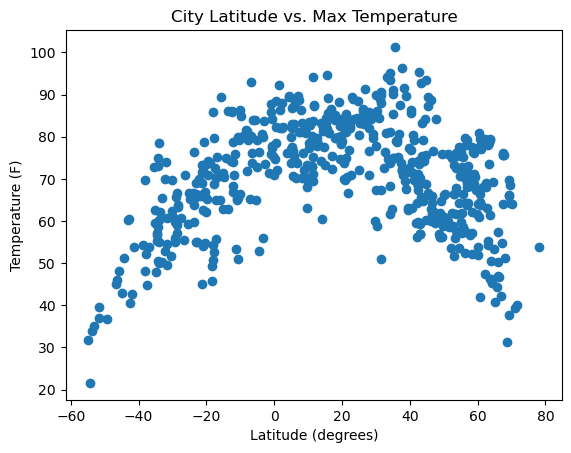

In [48]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Temperature (F)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

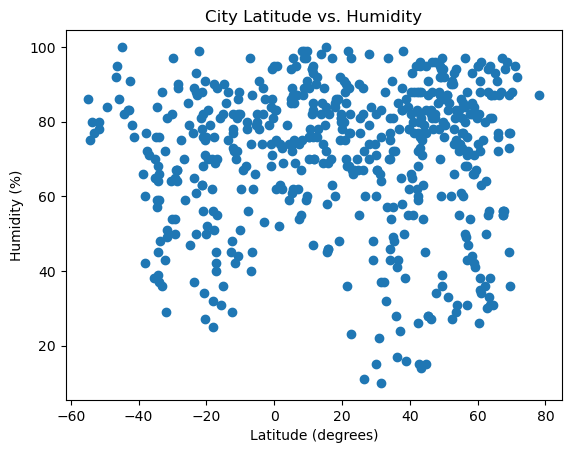

In [49]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

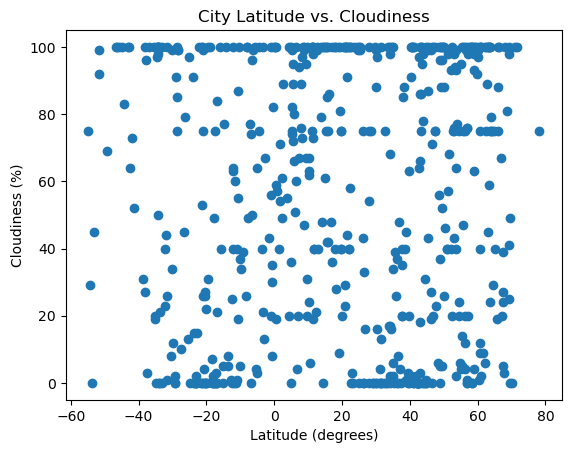

In [50]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

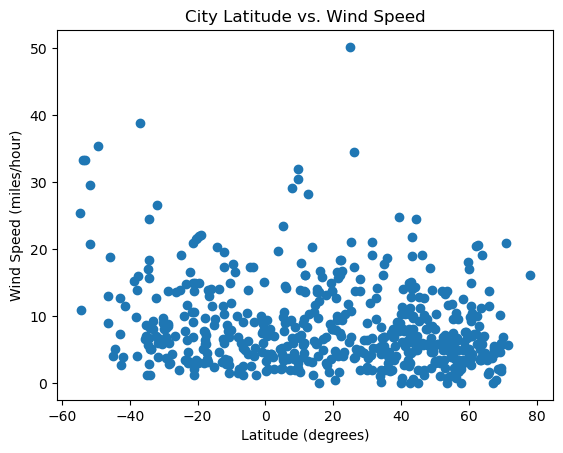

In [51]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Wind Speed (miles/hour)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE